In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('voice.csv')

In [3]:
data.shape

(3168, 21)

In [4]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


### 1. We will use acoustic features to distinguish a male voice from female. Load the dataset from “voice.csv”, identify the target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% of the data kept aside for testing. 

In [11]:
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])
data['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [14]:
x = data.drop(['label'],axis=1)
y = data['label']

In [21]:
x_train, x_test , y_train, y_test = train_test_split(x,y,train_size=0.8)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


### 2. Fit a logistic regression model and measure the accuracy on the test set. 

In [23]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
y_predict = logistic.predict(x_test)

print('Accuracy:',accuracy_score(y_predict,y_test))

Accuracy: 0.8927444794952681


C:\Users\YZQ8BX\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 3. Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated. Plot the correlation matrix using seaborn heatmap. 

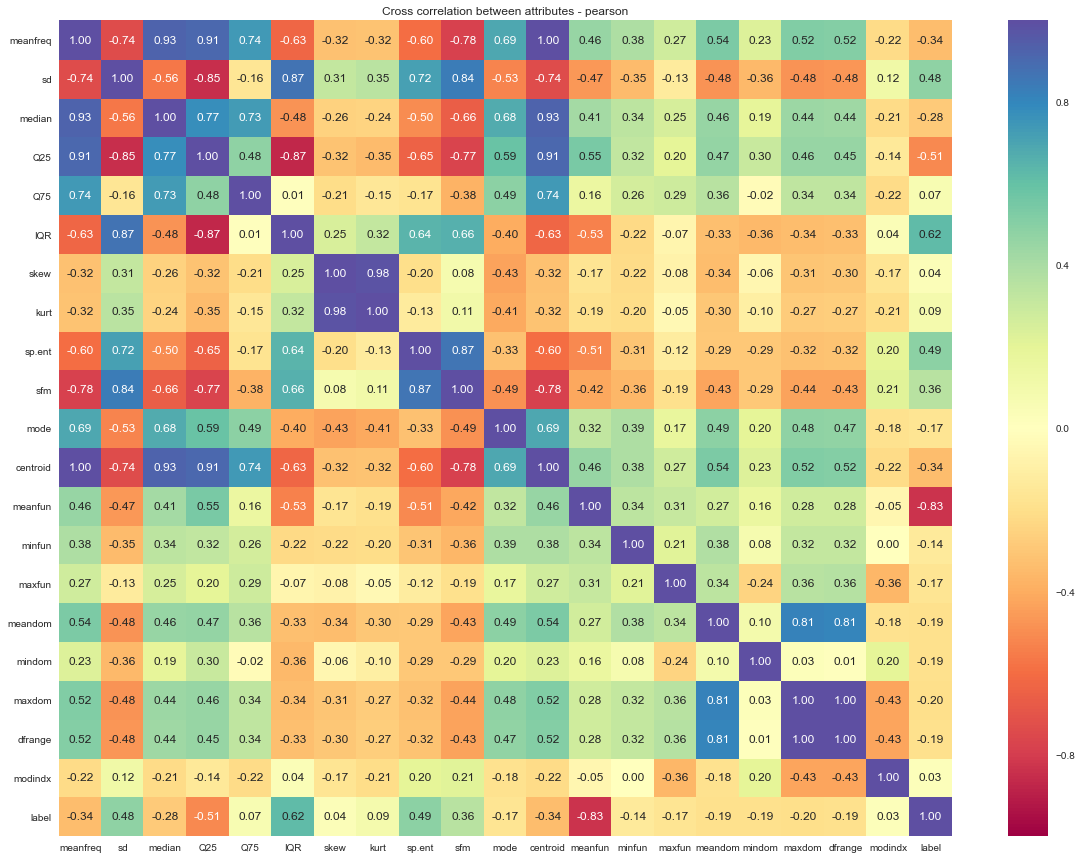

In [24]:
# Heat Map to represent correlation among attributes:

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(method='pearson'), annot = True, fmt='.2f', vmin=-1, vmax=1,cmap='Spectral')
plt.title('Cross correlation between attributes - pearson')
plt.show()

In [25]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [26]:
# from correlation it is observed that few of the independent variables are highly correlated to each other:
# maxdom - dfrange
# meanfreq - centroid
# kurt-skew


### 4. Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model.


In [27]:
# dropping the highly correlated variables:
x = x.drop(['maxdom','meanfreq','kurt'],axis=1)

In [28]:
x_train, x_test , y_train, y_test = train_test_split(x,y,train_size=0.8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 17)
(634, 17)
(2534,)
(634,)


In [29]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
y_predict = logistic.predict(x_test)

print('Accuracy:',accuracy_score(y_predict,y_test))

Accuracy: 0.9148264984227129


C:\Users\YZQ8BX\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
# The model accuracy has incread from 0.89 to 0.91 after feature engineering: